William Austin<br>
Prakash Dhimal<br>
George Mason University<br>
CS 584 Theory and Applications of Data Mining<br>
Semester project: Predicting the Impact of COVID-19

In [1]:
x = 3

In [2]:
x

3

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn


In [4]:
def get_raw_data():
    confirmed_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    recovered_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    death_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    return confirmed_df, recovered_df, death_df

In [5]:
confirmed_df, recovered_df, death_df = get_raw_data()
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [6]:
#confirmed_df.loc(confirmed_df["Country/Region"] == "United States")
confirmed_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,3029,3175,3313,3392,3538,3718,3860,4044,4283,4472
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3051,3053,3053,3053,3059,3063,3071,3074,3075,3076


In [7]:
confirmed_df["Country/Region"] == "US"

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Name: Country/Region, Length: 266, dtype: bool

In [8]:
confirmed_df.loc[6]

Province/State          NaN
Country/Region    Argentina
Lat                -38.4161
Long               -63.6167
1/22/20                   0
                    ...    
5/13/20                6879
5/14/20                7134
5/15/20                7479
5/16/20                7805
5/17/20                8068
Name: 6, Length: 121, dtype: object

In [9]:
us_series_full = confirmed_df.loc[confirmed_df["Country/Region"] == "US"]

In [10]:
us_data = us_series_full.drop(["Province/State", "Country/Region", "Lat", "Long"], axis = 1, inplace = False)
us_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
225,1,1,2,2,5,5,5,5,5,7,...,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757


In [11]:
us_data_list = us_data.transpose()
# us
#us_data_list_2 = us_data_list.rename({0: "Date", 1: "Count"}, axis="columns")
us_data_list

,225
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
5/13/20,1390406
5/14/20,1417774
5/15/20,1442824
5/16/20,1467820


In [12]:
confirmed = confirmed_df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis = 1, inplace = False)
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,0,0,0,0,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,0,0,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,0,0,0,0,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,0,0,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,0,0,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,0,0,0,0,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,0,0,0,0,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,0,0,0,0,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [13]:
j = confirmed_df.index[confirmed_df["Country/Region"] == "US"]
j

Int64Index([225], dtype='int64')

In [14]:
confirmed_df.index

RangeIndex(start=0, stop=266, step=1)

In [15]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20',
       '5/14/20', '5/15/20', '5/16/20', '5/17/20'],
      dtype='object', length=121)

In [16]:
confirmed.iloc[200].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 7,
 13,
 17,
 24,
 38,
 51,
 62,
 62,
 116,
 150,
 202,
 240,
 274,
 402,
 554,
 709,
 927,
 1170,
 1187,
 1280,
 1326,
 1353,
 1380,
 1462,
 1505,
 1585,
 1655,
 1686,
 1749,
 1845,
 1934,
 2003,
 2028,
 2173,
 2272,
 2415,
 2506,
 2605,
 2783,
 3034,
 3158,
 3300,
 3465,
 3635,
 3953,
 4220,
 4361,
 4546,
 4793,
 4996,
 5350,
 5647,
 5951,
 6336,
 6783,
 7220,
 7572,
 7808,
 8232,
 8895,
 9420,
 10015,
 10652,
 11350,
 12074,
 12739,
 13524,
 14355,
 15515]

In [17]:
def df_to_array(full_dataframe):
    temp = full_dataframe.drop(["Province/State", "Country/Region", "Lat", "Long"], axis = 1, inplace = False)
    return temp.values.flatten()
    

def get_country_dataframes(country_name):
    #filter_array = confirmed_df["Country/Region"] == country_name
    temp_confirmed = confirmed_df.loc[confirmed_df["Country/Region"] == country_name]
    temp_recovered = recovered_df.loc[recovered_df["Country/Region"] == country_name]
    temp_death = death_df.loc[death_df["Country/Region"] == country_name]
    return temp_confirmed, temp_recovered, temp_death

def get_country_arrays(country_name):
    c_temp, r_temp, d_temp = get_country_dataframes(country_name)
    return df_to_array(c_temp), df_to_array(r_temp), df_to_array(d_temp)


In [18]:
c, r, d = get_country_dataframes("US")
d

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,77180,78795,79526,80682,82356,84119,85898,87530,88754,89562


In [19]:
C, R, D = get_country_arrays("US")




/home/dhimal/gmu/dataMining/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dhimal/gmu/dataMining/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


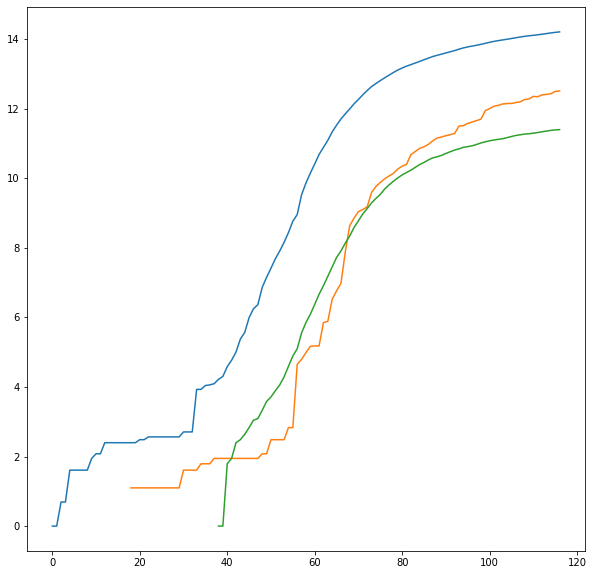

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(np.log(C))
plt.plot(np.log(R))
plt.plot(np.log(D))
#plt.plot(C)
#plt.plot(R)
#plt.plot(D)
plt.show()

    

[0.         0.         1.         0.         1.50000001 0.
 0.         0.         0.         0.40000001 0.14285715 0.
 0.37500001 0.         0.         0.         0.         0.
 0.27272728 0.         0.09090909 0.         0.08333334 0.
 0.         0.         0.         0.         0.         0.
 0.30769232 0.         0.         2.40000015 0.01960785 0.11764708
 0.01754386 0.05172415 0.15000003 0.08823531 0.39189199 0.21428579
 0.29661029 0.46308748 0.21659002 0.545802   0.29850785 0.12741334
 0.65694805 0.34410949 0.30523152 0.31509485 0.25562359 0.28859799
 0.33267011 0.39357219 0.23065405 0.78043802 0.41050724 0.33463336
 0.3055713  0.32360012 0.2346191  0.23010788 0.28568617 0.22129966
 0.20149664 0.17893468 0.17517733 0.17865014 0.14705121 0.15170327
 0.13875123 0.14479868 0.10530086 0.09858645 0.09643576 0.08928017
 0.08868815 0.08486512 0.06929511 0.06162007 0.06780776 0.05819852
 0.05851751 0.05660596 0.05786344 0.05892191 0.04559726 0.0386141
 0.04198674 0.04073088 0.04054049 0.

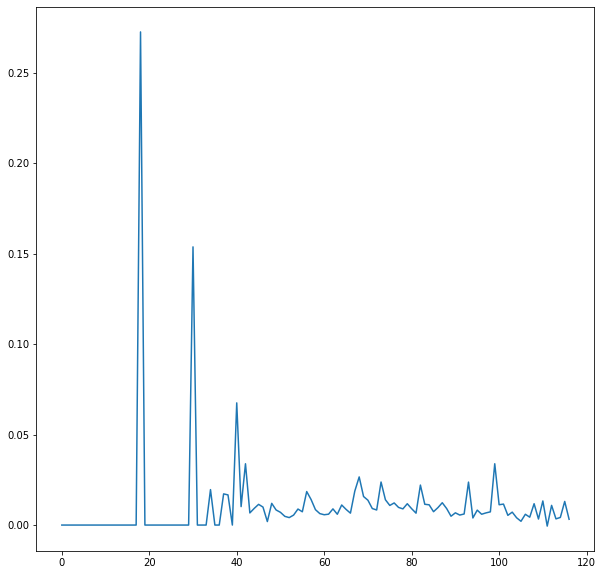

In [21]:
pop = 328000000
dayCount = C.shape[0]
s_model = np.zeros((dayCount,), dtype=np.int64)
s_delta = np.zeros((dayCount,), dtype=np.int64)
i_model = np.zeros((dayCount,), dtype=np.int64)
i_delta = np.zeros((dayCount,), dtype=np.int64)
r_model = np.zeros((dayCount,), dtype=np.int64)
r_delta = np.zeros((dayCount,), dtype=np.int64)

beta = np.zeros((dayCount,), dtype=np.float64)
gamma = np.zeros((dayCount,), dtype=np.float64)

for i in range(dayCount):
    s_model[i] = pop - C[i] - D[i] - R[i]
    i_model[i] = C[i]
    r_model[i] = D[i] + R[i]
    
    if i == 0:
        s_delta[i] = 0
        i_delta[i] = 0
        r_delta[i] = 0
        beta[i] = 0
        gamma[i] = 0
    else:
        s_delta[i] = s_model[i] - s_model[i - 1]
        i_delta[i] = i_model[i] - i_model[i - 1]
        r_delta[i] = r_model[i] - r_model[i - 1]
        
        beta[i] = (-1 * s_delta[i]) / ((s_model[i - 1] * i_model[i - 1]) / pop)
        gamma[i] = r_delta[i] / i_model[i - 1]
        
print(beta)
print(gamma)

plt.figure(figsize=(10, 10))
plt.plot(gamma)
#plt.plot(s_delta)
#plt.plot(i_delta)
#plt.plot(r_delta)
#plt.plot(C)
#plt.plot(R)
#plt.plot(D)
plt.show()
